In [1]:
# import library
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
# memuat data
data = pd.read_csv("MobilePhones.csv")
data.head()

,MobileName,RAM_GB,ROM_GB,Ratings,Reviews,Stars,ListPrice,SalesPrice
0,"Redmi 8 (Onyx Black, 64 GB)",4,64,674638,50064,4.4,10999,9999
1,"Realme 5i (Forest Green, 64 GB)",4,64,243106,16497,4.5,10999,10999
2,"Realme 5i (Aqua Blue, 64 GB)",4,64,243106,16497,4.5,10999,10999
3,"Redmi 8 (Sapphire Blue, 64 GB)",4,32,674638,50064,4.4,10999,9999
4,"POCO X2 (Matrix Purple, 128 GB)",6,64,133486,14732,4.5,19999,18499


In [3]:
x = data.drop(['MobileName'], axis=1)  # Exclude 'Manufacturer' and 'Price' as they are not features
y = data['SalesPrice']

In [5]:
# menerapkan SelectKBest untuk melakukan ekstraksi
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(x, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

# uji statistik dimana untuk mengambil nilai terbaik

In [6]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 10 best features

        Specs         Score
2     Ratings  2.864773e+07
3     Reviews  2.284700e+06
5   ListPrice  9.687656e+05
6  SalesPrice  9.089933e+05
1      ROM_GB  9.629751e+02
0      RAM_GB  4.636812e+02
4       Stars  5.888973e+00


In [7]:
# import library
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [9]:
# memuat data
data = pd.read_csv("MobilePhones.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [10]:
# melakukan ExtraTreesClassifier untuk mengekstraksi fitur
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.08835907 0.03303307 0.16489664 0.1673154  0.1237997  0.19153136
 0.23106476]


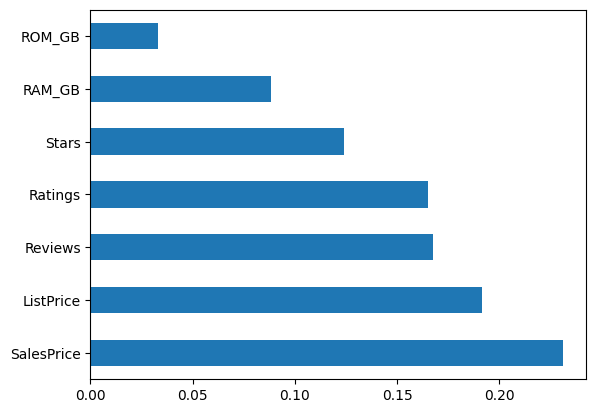

In [11]:
# melakukan plot dari feature importances
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [12]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
# memuat data
data = pd.read_csv("MobilePhones.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [14]:
# mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = data.corr()
top_corr_features = corrmat.index

<ipython-input-14-4292eadc843f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


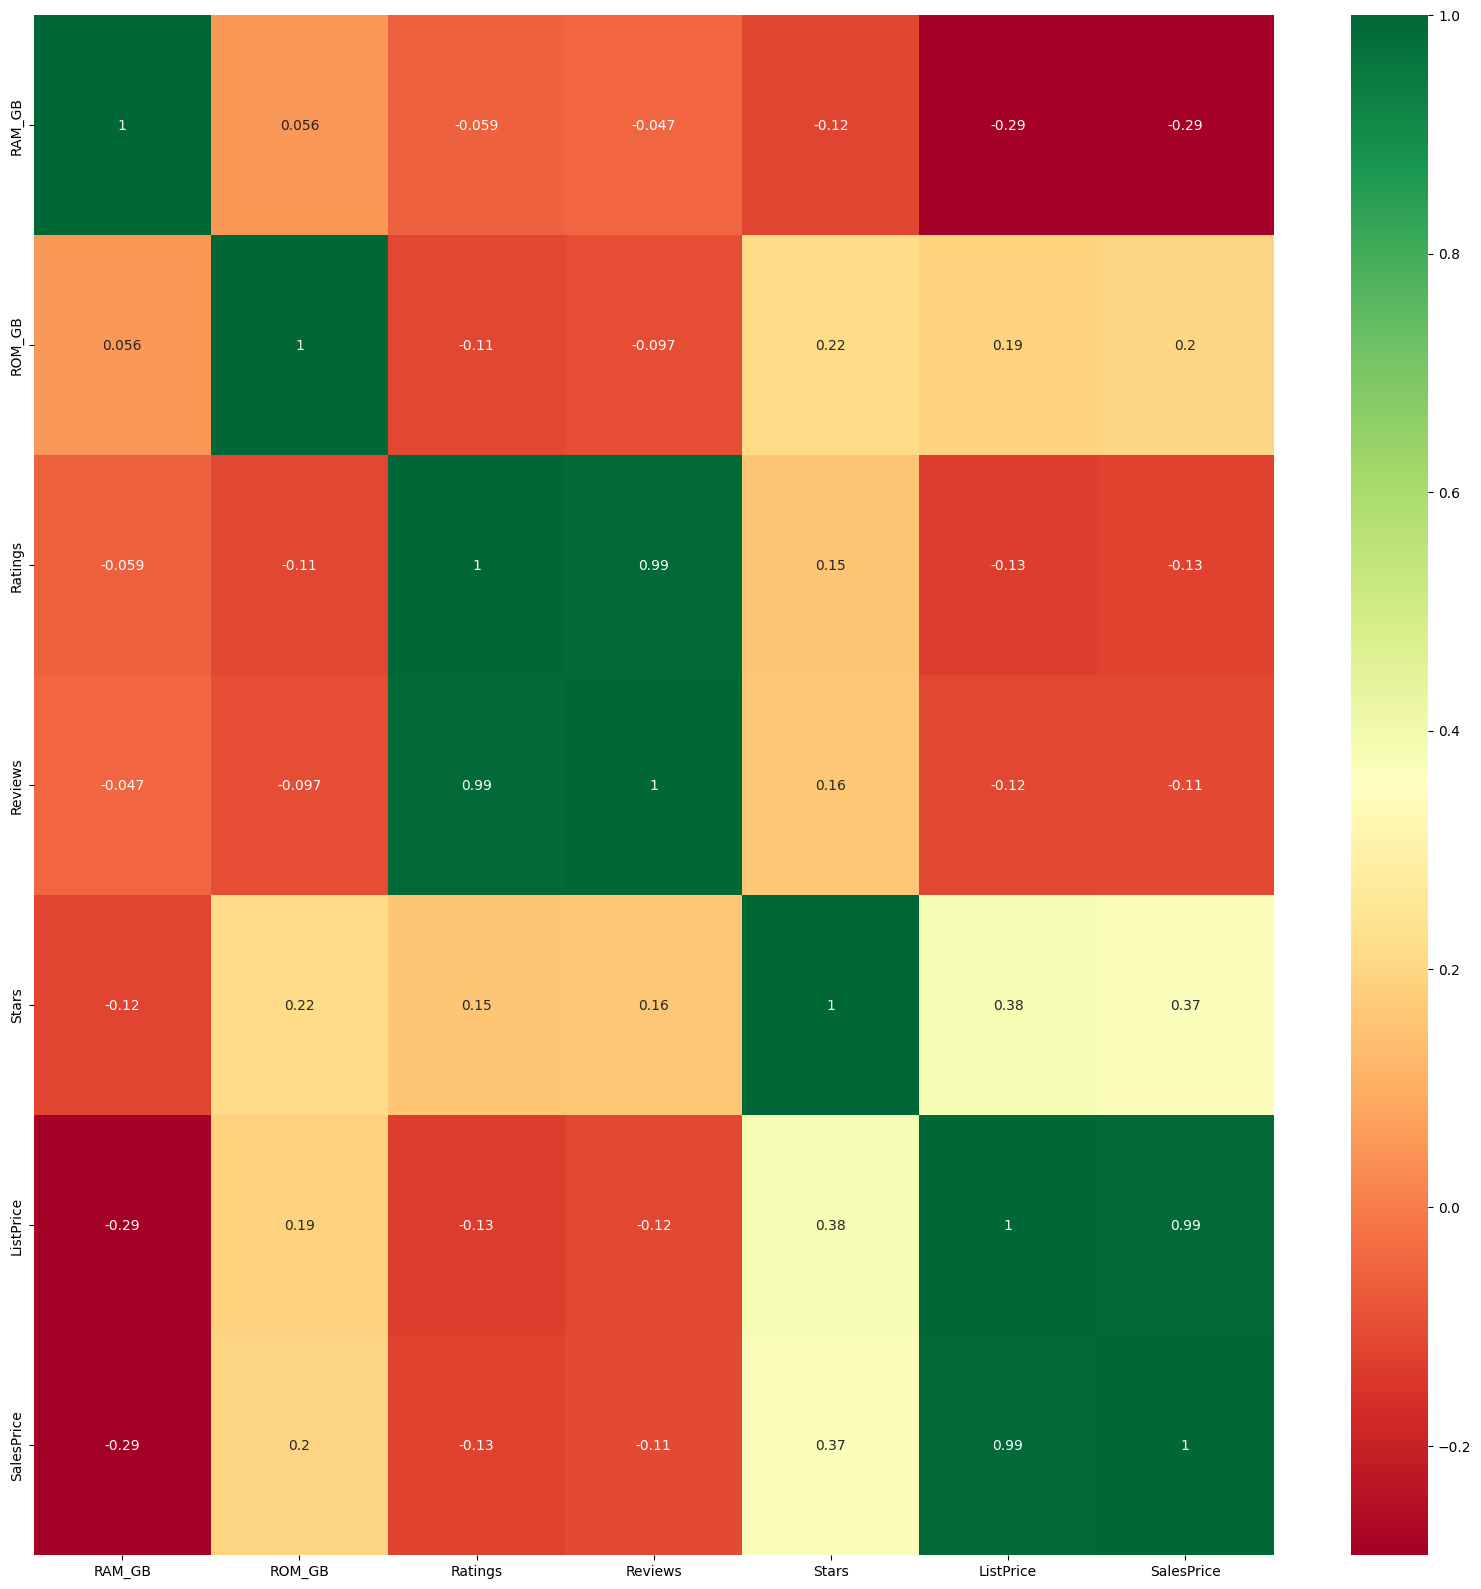

In [15]:
# plot heatmap
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# feature itu variable bebas, target variable terikat

# Kesimpulan
*  pada baris bawah SalesPrice hanya memiliki satu relasi kuat dengan ListPrice, memiliki hubungan yang lemah dengan variabel Stars dengan ROM_GB
* Memiliki relasi lemah dengan RAM_GB, ratings, dan reviews